# 😥 Stress Predictor#
**Brought to you by: [Saturdays.AI](https://www.saturdays.ai)** --- <i> Use it freely under [CC License](https://creativecommons.org/licenses/by/4.0/)</i> --- __*#ai4all #ai4good*__
<br><img width=120 src='https://github.com/SaturdaysAI/saturdaysai/raw/master/SaturdaysAI_logo_face_smile_small.gif'> 

# Notebook Modificado por:
### Christian Camilo Benavides
### Juan Jose Figueroa

# Introducción

Muchos de nosotros hemos usado alguna vez un *smartwatch*, aunque muchos solo lo utilizamos para mirar la hora, los mensajes de *Whatsapp* o saber quien no está llamando. Lo que muchas personas desconocen es que se puede utilizar para medir parámetros importantes de la salud como pueden ser el ritmo cardíaco o el oxígeno en sangre. Si eres un aficionado del ciclismo puede que conozcas las bandas cardíacas que se suelen situar en el pecho para medir las pulsaciones por minuto mientras estas haciendo ejercicio.

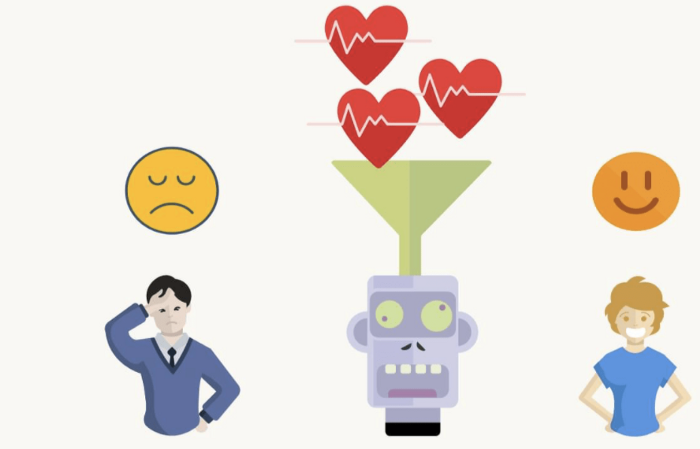

Durante el estado de alarma provocado por el confinamiento han aumentado significativamente los casos de estrés. Debido a que en ciertas partes del mundo hay pocos psicólogos por habitante y sumado a que en ciertas zonas aún sigue mal visto asistir al psicólogo, la mayoría de la gente busca información por internet para saber si está sufriendo alguna forma de estrés. 

¿No sería ideal disponer de un modelo de predicción que usara los datos obtenidos por wearables (ya sea monitores de frecuencia cardíaca o un smartwatch) para determinar si estás sufriendo estrés?

En este taller se quiere obtener precisamente eso, mediante datos obtenidos de un estudio, obtener un modelo que sirva para determinar si una persona sufre estrés o no.

Al final de este taller entre tus conocimientos deberías tener:
- Saber analizar un conjunto de datos.
- Saber preparar los datos para crear un modelo.
- Saber crear un modelo de predicción que se ajuste a los datos.

Dejémonos de charla y vamos a empezar!



# Como usar el Notebook

Este notebook ha sido implementado en Python, pero no te preocupes, para su ejecución no es necesario que conozcas el lenguaje en profundidad. Solamente debes ejecutar cada una de las celdas, teniendo en cuenta que hay que ejecutar una celda a la vez y secuencialmente en orden de aparición.

*   Para ejecutar cada celda pulsa en el botón  ▶ en la esquina superior izquierda de cada celda, mientras se esté ejecutando el botón estará girando. 
*   En caso de querer detener dicha ejecución, pulsa nuevamente sobre este botón mientras gira y la ejecución se detendrá.
*   En caso de que la celda tenga alguna salida (texto, gráficos, etc) será mostrada justo después de esta y antes de mostrar la siguiente celda.
*   El notebook estará guiado con todas las explicaciones necesarias, además irá acompañado por comentarios en el código para facilitar su lectura. En caso de tener alguna duda, anótala, que seguramente el ponente te dará tiempo de plantearla y como no, de resolverla.  







# Importando el Set de Herramientas

Las librerías son básicamente funciones que ya han sido escritas, bien por ti o por otros programadores, y te facilitaran muchas de la tareas que se deben hacer en el proyecto. Para este proyecto en concreto se usan las siguientes:

In [2]:
import pandas as pd                               
import os                                            
import numpy as np
import math 

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, tree, linear_model
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

# Importando los datos

Para usar los datos se podria descargar el dataset de Kaggle, que es de donde provienen los datos originales que vamos a tratar, para hacer la tarea de imprtar los datos más sencilla, ya que le dataset entero ocupa 9Gb y no se usan todos los datos, se han guardado en Github y a continuación se crean dos listas, una que contendrá los links de todos los ficheros que se necesitan leer de los datos hrv y otra con los mismos pero de los datos de eda.

In [3]:
#Dos listas con los links a los ficheros que se necesitan leer
hrv_links = ['https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S2-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S3-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S4-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S5-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S6-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S7-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S8-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S9-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S10-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S11-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S13-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S14-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S15-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S16-hrv.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/HRV/S17-hrv.xlsx?raw=true']
eda_links = ['https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S2-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S3-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S4-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S5-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S6-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S7-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S8-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S9-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S10-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S11-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S13-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S14-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S15-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S16-eda.xlsx?raw=true', 'https://github.com/MaxLeat/Datasets/blob/main/WESAD/EDA/S17-eda.xlsx?raw=true']

###__Comentario :__
###Nos parece muy interesante y util la herramienta de colab que permite importar de manera rapida los dataset para poder trabajar con ellos sin necesidad de descargar los archivos de sus respectivas paginas web y luego subirlos directamente aqui. 

Una vez tenemos las dos listas creadas, debemos leer todos los ficheros de cada una de las listas y crear un único dataset. Para hacer ésto , hemos creado una función que lee los ficheros de una lista de links y los guarda en un dataset.

In [4]:
def createDataset(links):
  df = pd.DataFrame()
  for link in links:
    aux = pd.read_excel(link)
    df = df.append(aux)
  return df

Ahora vamos a crear los dos datasets necesarios para el proyecto:

- eda
- hrv

In [5]:
eda = createDataset(eda_links)

In [6]:
hrv = createDataset(hrv_links)

In [7]:
eda.shape

(45677, 48)

In [8]:
hrv.shape

(184276, 66)

###__Comentario :__
###Interesante ver como podemos ver las caracteristicas del dataset y como crear uno solo para cada categoria a partir de la informacion de otros para trabajar de una manera mas cómoda.


In [9]:
eda.to_csv('EDA.CSV')
hrv.to_csv('HRV.CSV')

# Análisis Estadístico Básico

Disponemos de dos datasets: uno para la información de HRV y otro para la de EDA. ¿Qué contiene cada uno?
- EDA:  Electrodermal activity es aquella propiedad del cuerpo humano que causa una variación continua en las características eléctricas de la piel.
- HRV: En este dataset lo que se plasma es lo que en medicina se conoce como la variabilidad de la frecuencia cardíaca. Lo que se mira en éste dataset, de forma resumida, es el intervalo que transcurre entre un latido y el siguiente.

A continuación vamos a realizar un análisis estadístico básico de los datos. Lo primero que podemos hacer es mirar un ejemplo de la tabla ara ver su estructura y contenido

In [10]:
eda.head()

,Time,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,ALSC,INSC,APSC,RMSC,subject id,MEAN_LOG,INSC_LOG,APSC_LOG,RMSC_LOG,RANGE_LOG,ALSC_LOG,MIN_LOG,MEAN_1ST_GRAD_LOG,MEAN_2ND_GRAD_LOG,MIN_LOG_LOG,MEAN_1ST_GRAD_LOG_LOG,MEAN_2ND_GRAD_LOG_LOG,APSC_LOG_LOG,ALSC_LOG_LOG,APSC_BOXCOX,RMSC_BOXCOX,RANGE_BOXCOX,MEAN_YEO_JONSON,SKEW_YEO_JONSON,KURT_YEO_JONSON,APSC_YEO_JONSON,MIN_YEO_JONSON,MAX_YEO_JONSON,MEAN_1ST_GRAD_YEO_JONSON,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,condition,SSSQ
0,7.083333,2.696013,3.850174,1.829147,2.021027,-1.116486,0.400850,0.000009,0.010402,-5.558559e-07,0.008965,210055.879815,566162.761688,7.555647,2.748754,2,1.307255,13.246639,2.146592,1.321423,1.105597,12.255134,1.039975,0.000009,-5.558560e-07,0.712938,0.000009,-5.558562e-07,1.146320,2.584385,1.549687,0.774843,0.485311,0.550231,0.416131,-1.590441,0.944797,0.506686,0.534760,0.000007,0.549695,0.014526,1.421628,7.555647,-1.717460e-19,74932.402381,baseline,5
1,7.100000,2.689933,3.850174,1.829147,2.021027,-1.114279,0.402819,0.000009,0.010401,-2.738408e-07,0.008963,210055.922706,564885.968781,7.520855,2.742418,2,1.305608,13.244381,2.142517,1.319732,1.105597,12.255134,1.039975,0.000009,-2.738408e-07,0.712938,0.000009,-2.738408e-07,1.145024,2.584385,1.547044,0.773522,0.485311,0.550025,0.418244,-1.586404,0.944215,0.506686,0.534760,0.000007,0.549490,0.014524,1.421628,7.520855,-2.053498e-20,75109.279178,baseline,5
2,7.116667,2.683867,3.850174,1.829147,2.021027,-1.112083,0.404723,0.000009,0.010402,1.802899e-07,0.008964,210055.975271,563612.062836,7.486219,2.736095,2,1.303963,13.242123,2.138443,1.318041,1.105597,12.255134,1.039975,0.000009,1.802898e-07,0.712938,0.000009,1.802898e-07,1.143727,2.584385,1.544398,0.772199,0.485311,0.549819,0.420288,-1.582392,0.943631,0.506686,0.534760,0.000006,0.549285,0.014526,1.421628,7.486219,5.860220e-21,75286.616632,baseline,5
3,7.133333,2.677803,3.850174,1.829147,2.021027,-1.110320,0.406402,0.000009,0.010406,-2.652123e-07,0.008967,210056.029662,562338.662720,7.451648,2.729771,2,1.302316,13.239861,2.134361,1.316347,1.105597,12.255134,1.039975,0.000009,-2.652123e-07,0.712938,0.000009,-2.652124e-07,1.142425,2.584385,1.541741,0.770870,0.485311,0.549611,0.422091,-1.579175,0.943044,0.506686,0.534760,0.000007,0.549079,0.014533,1.421628,7.451648,-1.865438e-20,75465.008280,baseline,5
4,7.150000,2.671740,3.811646,1.829147,1.982498,-1.109101,0.407816,0.000009,0.010405,-1.784733e-07,0.008965,210056.095440,561065.318298,7.417126,2.723440,2,1.300666,13.237594,2.130268,1.314648,1.092761,12.255135,1.039975,0.000009,-1.784734e-07,0.712938,0.000009,-1.784734e-07,1.141119,2.584385,1.539072,0.769536,0.476526,0.549403,0.423609,-1.576951,0.942453,0.506686,0.534255,0.000007,0.548872,0.014532,1.408012,7.417126,-5.684863e-21,75644.568073,baseline,5


In [11]:
hrv.head()

,Time,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,condition,SSSQ
0,7.083262,897.392513,873.562810,170.971816,19.538659,19.493030,8.750437,68.865469,13.25,1.5,13.800959,241.396473,3.019031,1.690306,0.001275,0.000978,0.023027,0.011973,0.011973,1.923148,3.019031,1.690306,4207.177477,74.740521,1386.833800,24.637107,97.536084,35.033615,0.622372,2.463916,5629.044892,39.585803,0.025262,6.800607,29.956510,75.026961,0.000978,0.011902,0.011902,8.344785,7.235499,3.584452,8.635873,3.703418,3.022309,2.277312,2.656757,0.916291,2.694692,1.451850,1.240194,0.001254,1.240194,5.300796,4.014022,1.748030,9.114545,8.298522,703684.111546,0.174063,0.049657,1.965697,0.008327,2,baseline,5
1,7.087428,896.005887,873.513830,169.558513,19.567190,19.516526,8.665450,68.943400,13.25,1.5,13.817594,239.393510,3.153536,1.709984,0.001345,0.000994,0.023064,0.011980,0.011980,1.925268,3.153536,1.709984,4266.984930,74.842393,1398.688070,24.532817,97.516496,35.621129,0.624790,2.483504,5701.294129,39.265686,0.025468,6.799062,29.933357,75.506914,0.000993,0.011909,0.011908,8.358897,7.244005,3.600625,8.648624,3.695500,3.023697,2.268558,2.656757,0.916291,2.695815,1.487724,1.251478,0.001321,1.251478,5.305202,4.035122,1.748532,9.944790,8.303216,666317.132437,0.171156,0.049291,1.935464,0.008348,2,baseline,5
2,7.091595,894.600572,872.908040,168.076589,19.567218,19.516423,8.589703,69.022050,13.25,1.5,13.817521,237.294238,3.292424,1.729280,0.001337,0.000978,0.023064,0.012054,0.012054,1.913330,3.292424,1.729280,4334.869606,74.957583,1411.952310,24.415159,97.495219,36.274914,0.627258,2.504781,5783.096830,38.923657,0.025691,6.797495,29.909874,76.046675,0.000978,0.011982,0.011982,8.374677,7.253437,3.618321,8.662868,3.686969,3.023698,2.260690,2.656757,0.916291,2.695810,1.523641,1.262498,0.001314,1.262498,5.310084,4.058223,1.748529,10.840055,8.307951,669170.553087,0.168061,0.048884,1.902749,0.008368,2,baseline,5
3,7.095762,893.232563,872.211295,166.548000,19.579760,19.532607,8.506131,69.097187,13.25,1.5,13.828979,235.128118,3.438012,1.748865,0.001275,0.000916,0.023085,0.012094,0.012094,1.908715,3.438012,1.748865,4408.803741,75.075774,1426.671508,24.294224,97.472333,36.996656,0.630001,2.527667,5872.471905,38.562175,0.025932,6.795966,29.886997,76.632055,0.000916,0.012022,0.012022,8.391585,7.263800,3.637498,8.678201,3.677873,3.024308,2.251937,2.656757,0.916291,2.696583,1.560138,1.273639,0.001254,1.273639,5.315444,4.083279,1.748874,11.819928,8.312472,700739.775450,0.164809,0.048432,1.867660,0.008392,2,baseline,5
4,7.099928,891.925820,871.400185,165.009231,19.599071,19.556585,8.419237,69.167573,13.25,1.5,13.845956,232.947166,3.591055,1.768999,0.001201,0.000853,0.023117,0.012096,0.012096,1.911058,3.591055,1.768999,4487.283567,75.189313,1442.903342,24.177414,97.447578,37.793642,0.633274,2.552422,5967.980552,38.178468,0.026193,6.794504,29.865127,77.252706,0.000852,0.012024,0.012023,8.409226,7.275105,3.658256,8.694331,3.668127,3.025246,2.242754,2.656757,0.916291,2.697727,1.597310,1.285046,0.001182,1.285046,5.321284,4.110422,1.749384,12.895677,8.316704,742959.637571,0.161443,0.047936,1.830138,0.008422,2,baseline,5


Gracias al comando head() podemos ver algunas de las primeras filas y los valores que tienen en las diferentes columnas, esto sirve para hacer-nos una idea de si se han cogido bién los datos y ver que forma tiene el dataset de manera visual. 

También lo vamos a usar para comentar algunas variables que consideramos importantes en el dataset hrv:
- **SSSQ**: La variable objetivo que vamos a predecir, esta variable almacena un entero que indica el nivel de estrés alq ue el paciente dijo senitrse sometido. Ésta variable se obtiene mediante un questionario denominado Short State Stress Questionnare que valora el nivel de estrés en el que estan sometidos los pacientes.
- **Condition**: Esta variable lo que contiene es la situación a la que estaban sometidos los sujetos de pruebas de éste test. POr ejemplo, nos encontramos con baseline, amusement y stress entre otras.
- **MEAN_RR**: La media del tiempo entre latidos sucesivos. Se guarda la media en un tiempo específico debido a que los sensores que capturan estos datos capturan información mas rápido que el resto de cosas y por lo tanto se debe guardar la media de todos los valores capturados durante ese tiempo.
- **SDRRR**: La desviación estandard de intervalos sucesivos de RR (tiempo entre latidos)
- **RMSSD**: La media cuadrática de las diferencias sucesivas de RR
- **SDSD**: La desviación estandard relacionada de intervalos sucesivos. estav vez 
- **HR**: Heart Rate, la frequencia cardíaca
- **KURT**: Una medida matemática/estadística que mide los picos.
- **SKEW**: Una medida matemática/estadística que mide la simetria.

La mayoria de las otras variables son relaciones sobre variables simples o estan derivadas de éstas variables. Explicarlas todas conllevaria mucho tiempo pero si teneis alguna duda. Contactad con nosotros.

A parte de usar head() también podemo usar info() y se pueden obtener datos muy valiosos, como por ejemplo el número de registros en el dataset, la cantidad de columnas, y las entradas no-nulas. Vamos a utilizarlo para ver las variables del otro dataset y comentar algunas de las variables.

In [12]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45677 entries, 0 to 3112
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Time                      45677 non-null  float64
 1   MEAN                      45677 non-null  float64
 2   MAX                       45677 non-null  float64
 3   MIN                       45677 non-null  float64
 4   RANGE                     45677 non-null  float64
 5   KURT                      45677 non-null  float64
 6   SKEW                      45677 non-null  float64
 7   MEAN_1ST_GRAD             45677 non-null  float64
 8   STD_1ST_GRAD              45677 non-null  float64
 9   MEAN_2ND_GRAD             45677 non-null  float64
 10  STD_2ND_GRAD              45677 non-null  float64
 11  ALSC                      45677 non-null  float64
 12  INSC                      45677 non-null  float64
 13  APSC                      45677 non-null  float64
 14  RMSC   

Se pueden observar todas las 48 columnas observando que tipo de datos reside en cada una de ellas. Además podemos ver que las dimensiones del dataset son de 45677 filas y 48 columnas. 

Algunas de las columnas que podemos destacar para entender la información que tenemos son:
- **SSSQ**: El nivel de estrés en el que los participantes dijeron encontrarse en ese preciso momento
- **Condition**: La condición psicológica y física a la que estaban sometidos los voluntarios en ese preciso momento.
- **ALSC**: Arc Length of the SCR
- **INSC**: Integral of SCR
- **APSC**: Normalised average power of the SCR
- **RMSC**: Root Mean Square of the SCR

SCR: Skin conductance response. La respuesta de la piel a la conductancia electrica.

De igual manera que hemos visto en el anterior, de la variable base se disponia de más samples por unidad de tiempo que el tiempo que muestra el dataset. Por lo que en cada fila hay unas variables que inidican el máximo, mñinimo, media, el rango, la kurtosis y la skewness (explicados anteriormente). Estas variables son:
- **MAX**
- **MIN**
- **RANGE**
- **KURT**
- **SKEW**

La mayoria de las otras variables son relaciones sobre variables simples o estan derivadas de éstas variables. Explicarlas todas conllevaria mucho tiempo pero si teneis alguna duda. Contactad con nosotros.

Para ver de forma mas clara la cantidad de valores nulos podemos usar la función isnull() junto con el sum

In [13]:
hrv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184276 entries, 0 to 12447
Data columns (total 66 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Time                      184276 non-null  float64
 1   MEAN_RR                   184276 non-null  float64
 2   MEDIAN_RR                 184276 non-null  float64
 3   SDRR                      184276 non-null  float64
 4   RMSSD                     184276 non-null  float64
 5   SDSD                      184276 non-null  float64
 6   SDRR_RMSSD                184276 non-null  float64
 7   HR                        184276 non-null  float64
 8   pNN25                     184276 non-null  float64
 9   pNN50                     184276 non-null  float64
 10  SD1                       184276 non-null  float64
 11  SD2                       184276 non-null  float64
 12  KURT                      184276 non-null  float64
 13  SKEW                      184276 non-null  fl

El gran numero de variables puede resultar abrumador, pero de momento lo unico que teneis que tener en cuenta es que __R_R__ representa el intervalo de tiempo entre latidos del corazon, la mayor parte de los datos de este data frame se deriva a de este valor, ademas tened presente que todas la variables son valores __int__ (números enteros) o float (números con decimales) exceptiando condition que es object.

Object en Python es la forma más generica de definir un objeto, pero en realidad la columna condition es una variable categorica, es decir, tiene varios valores predeterminados posibles, baseline (normal), amusement (emocionado)...

__Valores extraños__

Lo siguinte seria comprovar si existen valores que no deberian en los datos.

__null__ indica la falta de un valor, si hubieran filas incompletas en el dataframe tendriamos que buscar una forma de lidiar con ellas antes de seguir avanzando:

In [14]:
# Usamos la funcion isnull para detectar valores nulos, seguida de sum para sumar la cantidad de estos.
hrv.isnull().sum()

Time          0
MEAN_RR       0
MEDIAN_RR     0
SDRR          0
RMSSD         0
             ..
HR_HF         0
HF_VLF        0
subject id    0
condition     0
SSSQ          0
Length: 66, dtype: int64

Una forma rapida de comprobar que en efecto no hay valores nulos es sumar todos los valores anteriores.

In [15]:
print("Numero total de valores nulos:", hrv.isnull().sum().sum())

Numero total de valores nulos: 0


De forma similar podemos comprobar si existen valores infinitos.

In [16]:
# La funcion isin permite comprovar si los datos especicado a continuación, en este caso infinito
# y menos infinito, se encuentran en el dataframe
hrv.isin([np.inf, -np.inf]).sum()

Time          0
MEAN_RR       0
MEDIAN_RR     0
SDRR          0
RMSSD         0
             ..
HR_HF         0
HF_VLF        0
subject id    0
condition     0
SSSQ          0
Length: 66, dtype: int64

In [17]:
print("Numero total de valores infinitos:", hrv.isin([np.inf, -np.inf]).sum().sum())

Numero total de valores infinitos: 0


###__Comentario:__
###Podemos ver que el manejo del dataset es muy intuitivo y podemos encontrar rapidamente objetos nulos y asi poder eliminarlos rapidamente en caso de que si los haya, en otras palabras podemos hacerle un tratamiento a las datos de forma eficiente observando asi todas las caractiristicas que proporciona las bases de datos con las cuales se esta trabajando.

__Estadisticas__ 

Podemos empezar observando la frecuencia de cada posible valor de salida de ambos datasets.

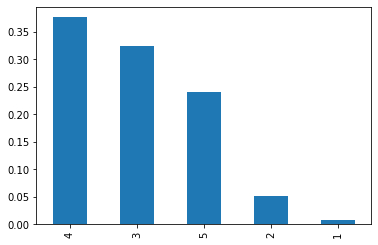

In [18]:
#Usamos un plot bar para observar la frecuencia de la variable objetivo
frequency = hrv['SSSQ'].value_counts(normalize=True) * 100
frequency_plot = hrv['SSSQ'].value_counts(normalize=True).plot(kind='bar')

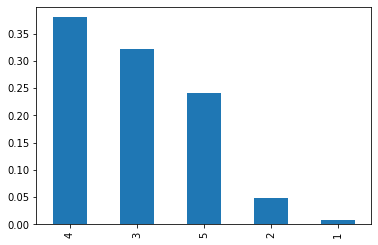

In [19]:
#Usamos un plot bar para observar la frecuencia de la variable objetivo
frequency = eda['SSSQ'].value_counts(normalize=True) * 100
frequency_plot = eda['SSSQ'].value_counts(normalize=True).plot(kind='bar')

Debido a que la mayoría de las variables del dataset son continuas la media, la desviación y los cuartiles pueden ser muy significativos por lo que merece tener en cuenta la función decribe.

In [20]:
hrv.describe()

,Time,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,SD2,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,MEAN_RR_LOG,MEAN_RR_SQRT,TP_SQRT,MEDIAN_REL_RR_LOG,RMSSD_REL_RR_LOG,SDSD_REL_RR_LOG,VLF_LOG,LF_LOG,HF_LOG,TP_LOG,LF_HF_LOG,RMSSD_LOG,SDRR_RMSSD_LOG,pNN25_LOG,pNN50_LOG,SD1_LOG,KURT_YEO_JONSON,SKEW_YEO_JONSON,MEAN_REL_RR_YEO_JONSON,SKEW_REL_RR_YEO_JONSON,LF_BOXCOX,HF_BOXCOX,SD1_BOXCOX,KURT_SQUARE,HR_SQRT,MEAN_RR_MEAN_MEAN_REL_RR,SD2_LF,HR_LF,HR_HF,HF_VLF,subject id,SSSQ
count,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,1.842760e+05,184276.000000,1.842760e+05,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000,184276.000000
mean,43.220938,814.077091,813.240321,77.846221,15.181785,15.178310,5.355458,77.465981,11.426991,1.323853,10.746161,109.522609,0.025546,0.136306,-0.000007,0.000586,0.018413,0.009031,0.009031,2.174341,0.025546,0.136306,2282.672964,61.321093,1201.445997,37.187061,96.432601,25.895056,1.491846,3.567399,3510.014017,195.308101,0.041047,6.684318,28.399824,54.877664,0.000584,0.008982,0.008982,7.305092,6.734826,2.785265,7.840975,4.117265,2.703618,1.819051,2.033535,0.550898,2.387696,-0.262298,0.126465,-0.000010,0.126465,52.283182,4.019816,26.200039,1.172967e+00,8.755288,-2.856920e+06,0.158817,0.178484,11.545325,0.032643,9.311017,3.789598
std,28.852130,153.309950,159.031963,35.565870,6.319436,6.318806,1.706153,16.658166,10.981562,2.225197,4.473680,50.191981,1.082738,0.576780,0.000402,0.001951,0.006221,0.004243,0.004243,0.554049,1.082738,0.576780,2445.457359,17.143146,960.037193,16.471952,5.247988,31.633394,2.598666,5.247988,2989.748575,502.380792,0.076215,0.199285,2.743562,22.326189,0.001949,0.004179,0.004179,0.964336,0.929075,1.045671,0.850938,1.389349,0.411082,0.239625,1.087853,0.691058,0.398502,0.808245,0.587300,0.000402,0.587300,101.392075,2.518113,75.485204,4.675064e+00,0.900509,9.896179e+08,0.188676,0.409203,24.484778,0.071603,4.694558,0.892661
min,1.683802,411.068840,411.966595,13.786706,2.294390,2.292144,1.887603,47.557070,0.000000,0.000000,1.622825,19.426503,-1.646654,-2.046116,-0.002343,-0.006698,0.004686,0.002122,0.002122,0.762220,-1.646654,-2.046116,23.611249,9.291588,14.407984,2.123127,42.275595,0.090606,0.000906,0.013081,80.541094,0.732370,0.000131,6.021190,20.274833,8.974469,-0.006721,0.002120,0.002120,3.203204,2.734886,0.086734,4.401107,0.549490,1.192221,1.060427,0.000000,0.000000,0.964252,-3.484669,-2.525464,-0.002168,-2.525464,1.187518,-2.218632,0.645807,8.252542e-11,6.896163,-3.426834e+11,0.021295,0.008200,0.294702,0.000009,2.000000,1.000000
25%,16.947133,719.991035,716.492310,54.522222,10.157620,10.154620,4.223851,66.149855,2.250000,0.000000,7.189415,76.619122,-0.601637,-0.236675,-0.000243,-0.000565,0.013457,0.006511,0.006511,1.889815,-0.601637,-0.236675,864.902833,49.273943,460.065741,24.975870,96.048945,7.357231,0.222865,0.762780,1575.753070,24.309693,0.007686,6.580627,26.832649,39.695756,-0.000565,0.006490,0.006489,6.763773,6.133541,2.123127,7.363123,3.231187,2.412123,1.653235,1.178655,0.000000,2.102843,-0.789665,-0.238103,-0.000244,-0.238103,5.275699,2.273764,1.813742,7.243707e-02,8.133256,-3.551827e+06,0.07322

In [21]:
eda.describe()

,Time,MEAN,MAX,MIN,RANGE,KURT,SKEW,MEAN_1ST_GRAD,STD_1ST_GRAD,MEAN_2ND_GRAD,STD_2ND_GRAD,ALSC,INSC,APSC,RMSC,subject id,MEAN_LOG,INSC_LOG,APSC_LOG,RMSC_LOG,RANGE_LOG,ALSC_LOG,MIN_LOG,MEAN_1ST_GRAD_LOG,MEAN_2ND_GRAD_LOG,MIN_LOG_LOG,MEAN_1ST_GRAD_LOG_LOG,MEAN_2ND_GRAD_LOG_LOG,APSC_LOG_LOG,ALSC_LOG_LOG,APSC_BOXCOX,RMSC_BOXCOX,RANGE_BOXCOX,MEAN_YEO_JONSON,SKEW_YEO_JONSON,KURT_YEO_JONSON,APSC_YEO_JONSON,MIN_YEO_JONSON,MAX_YEO_JONSON,MEAN_1ST_GRAD_YEO_JONSON,RMSC_YEO_JONSON,STD_1ST_GRAD_YEO_JONSON,RANGE_SQRT,RMSC_SQUARED,MEAN_2ND_GRAD_CUBE,INSC_APSC,SSSQ
count,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,4.567700e+04,45677.000000,4.567700e+04,45677.000000,45677.000000,4.567700e+04,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,4.567700e+04,4.567700e+04,45677.000000,4.567700e+04,4.567700e+04,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,45677.000000,4.567700e+04,45677.000000,45677.000000,45677.000000,45677.000000,4.567700e+04,45677.000000,45677.000000
mean,42.630744,4.787209,5.224640,4.304599,0.920042,0.683678,0.412802,-6.595816e-07,0.006455,6.838356e-10,0.005556,210018.878816,1.005314e+06,35.000403,4.794191,9.365217,1.590009,13.551342,2.771317,1.591189,0.574100,12.254957,1.481279,-6.595890e-07,6.838274e-10,0.874872,-6.595964e-07,6.838192e-10,1.255172,2.584372,3.901562,1.950781,-0.686327,2.748976,0.373912,-0.282901,3.969511,152.622619,2.444146,-6.424530e-07,2.738612,0.041356,0.883395,35.000403,-6.508076e-22,77927.526054,3.798345
std,28.349955,3.463419,3.705061,3.347559,1.091152,2.641517,0.669235,3.792689e-06,0.002945,1.282531e-07,0.002515,17.750375,7.273179e+05,54.823275,3.466468,4.678852,0.578793,0.771642,1.331739,0.578921,0.341504,0.000085,0.620208,3.792705e-06,1.282531e-07,0.267092,3.792721e-06,1.282531e-07,0.397770,0.000006,7.658122,3.829061,0.950592,6.392454,0.641340,1.508465,7.727398,610.681602,5.273392,3.674329e-06,6.275692,0.053094,0.373709,54.823275,4.854692e-20,67762.905277,0.888074
min,1.483333,0.455696,0.684357,0.000000,0.242996,-1.850279,-2.226805,-2.878371e-05,0.002406,-1.184827e-06,0.002030,210001.295471,9.569609e+04,0.209956,0.458209,2.000000,0.375484,11.468943,0.190584,0.377209,0.217525,12.254874,0.000000,-2.878412e-05,-1.184828e-06,0.000000,-2.878454e-05,-1.184828e-06,0.174444,2.584365,-1.951116,-0.975558,-3.522714,0.212158,-2.484215,-4.135182,0.175012,0.000000,0.207366,-2.316052e-05,0.212643,0.000488,0.492946,0.209956,-1.663277e-18,9788.041853,1.000000
25%,16.816667,2.132113,2.421188,1.633835,0.460052,-0.977939,0.024692,-9.209769e-07,0.004165,-4.586719e-08,0.003594,210005.748156,4.477437e+05,4.572620,2.138368,5.000000,1.141708,13.011978,1.717865,1.143703,0.378472,12.254895,0.968441,-9.209773e-07,-4.586719e-08,0.677242,-9.209778e-07,-4.586720e-08,0.999847,2.584367,0.550856,0.275428,-1.315896,0.428660,0.024564,-1.468087,0.647219,0.406558,0.453900,-9.125212e-07,0.431481,0.001333,0.678272,4.572620,-9.649537e-23,30892.624333,3.000000
50%,39.250000,3.759317,3.942490,3.442764,0.548172,-0.316529,0.403250,-1.798357e-07,0.006117,2.270653e-09,0.005300,210013.992574,7.894565e+05,14.157075,3.762589,9.000000,1.560104,13.579101,2.718467,1.560791,0.437075,12.254934,1.491277,-1.798357e-07,2.270653e-09,0.912795,-1.798358e-07,2.270653e-09,1.313312,2.584370,1.280604,0.640302,-0.815632,0.629789,0.384097,-0.368468,1.198516,0.747671,0.601107,-1.791193e-07,0.629923,0.019031,0.740386,14.157075,1.170718e-26,55761.995159,4.000000
75%,65.383333,6.769423,7.417679,6.212234,0.876617,1.304814,0.819133,3.351484e-07,0.008168,5.267915e-08,0.007122,210024.629422,1.421579e+06,46.021695,6.783929,14.000000,2.050196,14.167279,3.850609,2.052061,0.629471,12.254985,1.975779,3.351483e-07,5.267915e-08,1.090506,3.351483e-07,5.267915e-08,1.579104,2.584374,2.005816,1.002908,-0.138415,0.894646,0.763026,0.844128,1.957624,1.997082,0.823069,3.371498e-07,0.8

###__Comentario:__ 
###Es importante como se puede usar herramientas de los dataset relacionadas con la estadistica y los valores que pueden ofrecer a la hora comprender los datos obtenidos, ya que rapidamente nos ofrece, un promedio, los cuartiles, desviacion estandar, entre otras caracteristicas que son muy utiles. Ademas si se grafica los datos muchas veces se puede comprender mejor sus tendencias.

# Análisis exploratorio de datos

En este apartado exploraremos en mayor profundidad los datos y las relaciones entre ellos para prepararnos para tratarlos.

Analizar en profundidad todas las variables en este caso particular resulta poco práctico, dada su cantidad, por lo que para hacernos una idea podeis escoger tres para hacernos una idea.

Por defecto usaremos estas variables del dataset HRV, pero podeis modificarlas a voluntad:
- HR: Heart Rate
- LF: Low frequency
- HF: High Frequency

El primer paso sera generar sus histogramas para observar cual de ellas tiene mayor impacto al determinar la clase (el nivel de estrés).

In [22]:
# Guardamos las tres variables que queremos explorar
feats_to_explore = ['HR', 'LF', 'HF']

In [23]:
# Crear un plot con la incidencia de cada variable en las diferentes clases de la variable objetivo

def plot_hist(df, feats_to_explore, mean_line = False):
    """
    Plot the histograms of all the pased features.
    """
    
    fig, ax = plt.subplots(1, 3, figsize=(16,5))
    
    class_0 = df[feats_to_explore][df.SSSQ==1] # definir class 0
    class_1 = df[feats_to_explore][df.SSSQ==2] # definir class 1
    class_2 = df[feats_to_explore][df.SSSQ==3] # definir class 2
    class_3 = df[feats_to_explore][df.SSSQ==4] # definir class 3
    class_4 = df[feats_to_explore][df.SSSQ==5] # definir class 4

    for i in range(len(feats_to_explore)):
        _,bins=np.histogram(df[feats_to_explore].iloc[:,i],bins=15)
        
        
        ax[i].hist(class_0.iloc[:,i],color = 'r', bins=bins,alpha=0.3, label='Class 0')
        ax[i].axvline(class_0.iloc[:,i].mean(), color='r', visible=mean_line, alpha=0.3)
        
        ax[i].hist(class_1.iloc[:,i],color = 'b', bins=bins,alpha=0.3, label='Class 1')
        ax[i].axvline(class_1.iloc[:,i].mean(), color='b', visible=mean_line, alpha=0.3)
        
        ax[i].hist(class_2.iloc[:,i],color = 'm',bins=bins,alpha=0.3, label='Class 2')
        ax[i].axvline(class_2.iloc[:,i].mean(), color='m', visible=mean_line, alpha=0.3)

        ax[i].hist(class_3.iloc[:,i],color = 'y',bins=bins,alpha=0.3, label='Class 3')
        ax[i].axvline(class_3.iloc[:,i].mean(), color='y', visible=mean_line, alpha=0.3)

        ax[i].hist(class_4.iloc[:,i],color = 'g',bins=bins,alpha=0.3, label='Class 4')
        ax[i].axvline(class_4.iloc[:,i].mean(), color='g', visible=mean_line, alpha=0.3)

        ax[i].set_title(feats_to_explore[i],fontsize=9)
        
        #Si queremos la linea de la media
        if mean_line:
            std_0 = round(class_0.iloc[:,i].std(), 2)
            std_1 = round(class_1.iloc[:,i].std(), 2)
            std_2 = round(class_2.iloc[:,i].std(), 2)
            std_3 = round(class_3.iloc[:,i].std(), 2)
            std_4 = round(class_4.iloc[:,i].std(), 2)
            
            ax[i].legend(('Class 0: '+ str(std_0), 'Class 1: '+ str(std_1), 'Class 2: '+ str(std_2), 'Class 3: '+ str(std_3), 'Class 4: '+ str(std_4)), loc='best')
           
        else:
            ax[i].legend(loc='best')
            
     
        
    return plt

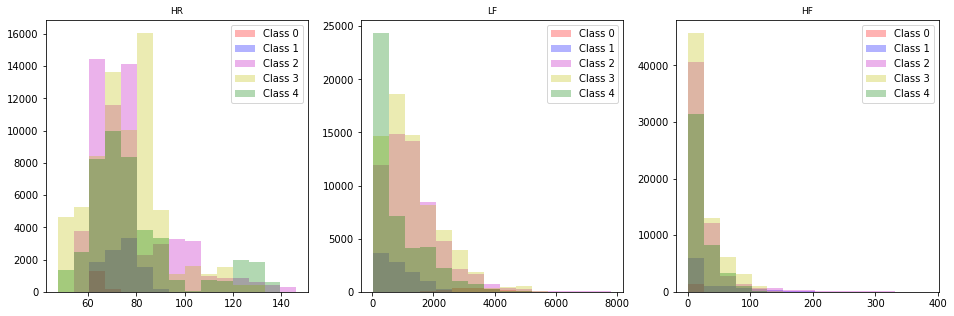

In [24]:
#Mostrar los histogramas
plt = plot_hist(hrv, feats_to_explore, mean_line = False)

Que conclusiones se sacan de estos tres histogramas?

Observando los diferentes histogramas podemos ver que en ninguno de ellos se aprecian con diferencia los colores de las distintas clases que se estan analizando. De ésto podemos sacar que los valores de las variables que estamos analizando no tienen una tendencia clara respecto a la variable final ya que la mayoria de las clases estan todas amontonadas encima de las otras. 

Para poner en contexto que nos encontrariamos en el caso contrario podemos observar la siguiente imagen de otro analisis estadístico básico. 

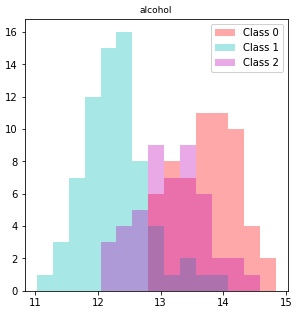



En éste gráfico podemos ver como hay 3 clases objetivo y estamos mirando una variable llamada alcohol. Se puede observar como las tres clases tienen un rango de valores bastante diferenciado, en éste caso podriamos decir que dependiendo del valor de la variable podriamos preveer con mas exactitud la clase objetivo.

Si volvemos a mirar nuestros histogramas podemos ver que ninguno de los tres presenta los colores de las clases diferenciados con claridad.

###__Comentario:__
###Nos parece muy util la herramienta plot que se usa para graficar las variables de interes por medio de histogramas. Podemos apreciar lo importante de esto para sacar concluciones y tener mas fundamentos a la hora de crear una aplicacion predictora ya que para esto se debe comprender correctamente los datos que se tiene y gracias a esto como se menciona anteriormete por medio de estos graficos se puede apreciar si de verdad existen tendencias o variables relacionadas directamente entre se, para de esta manera saber como proceder ya al respecto.


El siguiente paso será mostrar la correlación entre estas 3 variables, lo haremos empleando un heatmap.

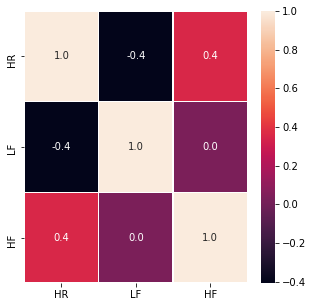

In [25]:
# Obtener la matriz de correlación
corr_mat = hrv[feats_to_explore].corr()

# CReamos la figura
fix, ax = plt.subplots(figsize=(5, 5))

# Usamos Seaborn para mostrat la correlación como un Heatmap
sns.heatmap(corr_mat, annot=True, linewidths=0.4, ax=ax, fmt='.1f')

También se puede observar la correlación realizando un pairplot() del dataset entero y seleccionando las variables a analizar (las mismas 3 que antes)


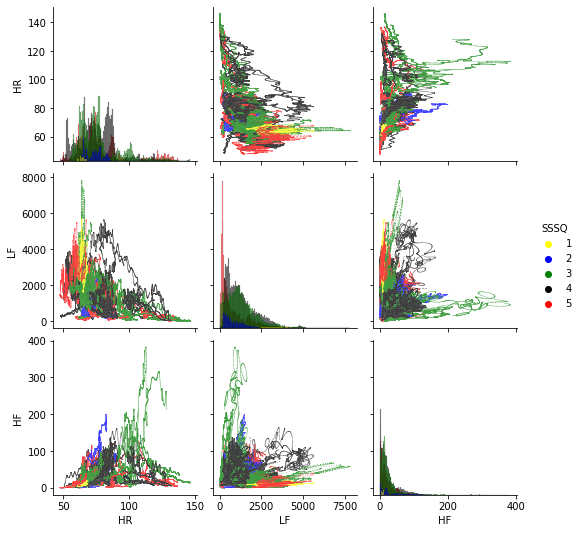

In [26]:
# Ahora mostramos las correlaciones con un pairplot
sns.pairplot(hrv, vars=feats_to_explore, diag_kind="hist", hue='SSSQ', plot_kws={"s":0.5}, palette={1:"yellow", 2:"blue", 3:"green", 4:"black", 5:"red"})

Dado que el tiempo entre latidos, __R_R__ es la magnitud más importante dentro del dataframe HRV, nos parece importante comprobar si se correlaciona directamente con la clase:

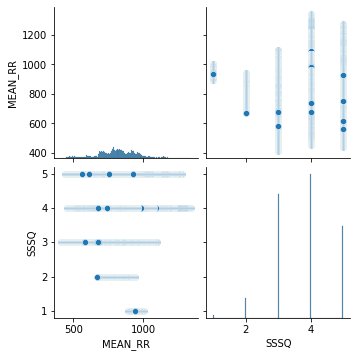

In [27]:
sns.pairplot(hrv, vars=["MEAN_RR", "SSSQ"], diag_kind="hist")

Vemos que no se observa una tendencia clara entre la media del tiempo entre latidos y el nivel de estrés de los pacientes.

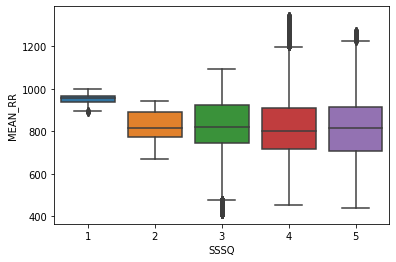

In [28]:
sns.boxplot(data=hrv, x="SSSQ", y="MEAN_RR")

Observando el oxplot tampoco podemos observar una tendencia clara, quizá lo único que podriamos concluir de éste último gráfico es que para nivel de estrés 1 (el más bajo) la media del tiempo entre latidos es la más alta.

###__Comentario:__
###La correlación entre una y otras variables es muy importante a la hora de sacar una conclusion debido a que podemos observar directamente si existe de verdad una tendencia clara entre unas y otras variables analizadas. Por otra parte podemos ver que la manera en que se realizan estos analisis en python se consiguen de una manera muy simple lo cual ayuda a un procesamiento mas eficiente y rapido.

# Preparación de los Datos

La mayor parte de los métodos que emplearemos de ahora en adelante funcionan exclusiva o preferentemente con valores númericos, puesto que condition es nuestra unica variable categorica la convertiremos en númerica mediante OneHotEncoding, esto implica que en lugar de tener una sola variable condition con cuatro posibles valores (amusement, baseline, meditation y stress) tendriemos cuatro variables que actuaran como boolianas, meditation = 1 (esta meditando), meditation = 0 (no lo esta aciendo)...

In [29]:
eda = pd.concat( [eda, pd.get_dummies(eda.condition)], axis=1)
eda = eda.drop(['condition'],axis=1)

# Reordenamos los valores por id de usuario y tiempo
eda = eda.sort_values(['subject id','Time'],ascending=[1,1]) 

Tenemos muchos datos con diferentes intervalos de tiempo, la siguiente funcion agrupara, para cada usuario, los valores que esten en la misma de decima de segundo y guardara su media.

In [30]:
def downsample(data):
    INTERVAL='1S'
    data['TIMEUTC'] = pd.to_datetime(data['Time'], unit='s')
    return data.groupby(by='subject id').resample(INTERVAL, on='TIMEUTC').mean()

In [31]:
eda_sel = downsample(eda)
eda_sel = eda_sel.drop(['subject id'],axis=1)
eda_sel.head()

Time      MEAN  ...  meditation  stress
subject id TIMEUTC                                   ...                    
2          1970-01-01 00:00:07   7.533333  2.541901  ...         0.0     0.0
           1970-01-01 00:00:08   8.491667  2.251932  ...         0.0     0.0
           1970-01-01 00:00:09   9.491667  2.018131  ...         0.0     0.0
           1970-01-01 00:00:10  10.491667  1.840669  ...         0.0     0.0
           1970-01-01 00:00:11  11.491667  1.700759  ...         0.0     0.0

[5 rows x 50 columns]

A continuacion aplicamos el mismo tratamiento a los datos de hrv:

In [32]:
# En este caso, no eliminamos completamente condition ya que a continuacion uniremos ambos datasets y la condicion en el mismo instante sera igual para ambos
hrv = hrv.drop(['condition'],axis=1)
hrv = hrv.sort_values(['subject id','Time'],ascending=[1,1]) 

In [33]:
hrv_sel = downsample(hrv)
hrv_sel = hrv_sel.drop(['subject id'],axis=1)
hrv_sel.head()

Time     MEAN_RR  ...    HF_VLF  SSSQ
subject id TIMEUTC                                     ...                
2          1970-01-01 00:00:07   7.541595  852.800787  ...  0.036721   5.0
           1970-01-01 00:00:08   8.502012  832.294873  ...  0.100764   5.0
           1970-01-01 00:00:09   9.502012  826.602916  ...  0.045527   5.0
           1970-01-01 00:00:10  10.502012  835.958674  ...  0.018859   5.0
           1970-01-01 00:00:11  11.502012  845.152527  ...  0.010126   5.0

[5 rows x 64 columns]

Ahora unimos ambos datasets:

In [34]:
## JOIN ##
# Primero añadimos uns prefijos a los nombres de las variables para que sea más facil distinguirlos después
eda_sel2 = eda_sel.add_prefix('eda_')
hrv_sel2 = hrv_sel.add_prefix('hrv_')

# Hacemos un join de los dos datasets anteriores
data = pd.concat([eda_sel2,hrv_sel2], sort='False', axis=1)

# Hacemos drop de las variables repetidas
data = data.drop(['hrv_Time','hrv_SSSQ'], axis=1)
# Renombramos las columnas 
data.rename(columns={'eda_Time':'Time', 'eda_amusement':'amusement', 'eda_baseline': 'baseline', 'eda_meditation': 'meditation', 'eda_stress': 'stress', 'eda_SSSQ':'SSSQ'}, inplace=True)  



In [35]:
# Hacemos un drop de los valores nulos
data = data.dropna()

In [36]:
# Hacemos un reset del indice para poder trabajar con el indice a continuación
data1 = data.reset_index()
data1

,subject id,TIMEUTC,Time,eda_MEAN,eda_MAX,eda_MIN,eda_RANGE,eda_KURT,eda_SKEW,eda_MEAN_1ST_GRAD,eda_STD_1ST_GRAD,eda_MEAN_2ND_GRAD,eda_STD_2ND_GRAD,eda_ALSC,eda_INSC,eda_APSC,eda_RMSC,eda_MEAN_LOG,eda_INSC_LOG,eda_APSC_LOG,eda_RMSC_LOG,eda_RANGE_LOG,eda_ALSC_LOG,eda_MIN_LOG,eda_MEAN_1ST_GRAD_LOG,eda_MEAN_2ND_GRAD_LOG,eda_MIN_LOG_LOG,eda_MEAN_1ST_GRAD_LOG_LOG,eda_MEAN_2ND_GRAD_LOG_LOG,eda_APSC_LOG_LOG,eda_ALSC_LOG_LOG,eda_APSC_BOXCOX,eda_RMSC_BOXCOX,eda_RANGE_BOXCOX,eda_MEAN_YEO_JONSON,eda_SKEW_YEO_JONSON,eda_KURT_YEO_JONSON,eda_APSC_YEO_JONSON,eda_MIN_YEO_JONSON,eda_MAX_YEO_JONSON,...,hrv_VLF_PCT,hrv_LF,hrv_LF_PCT,hrv_LF_NU,hrv_HF,hrv_HF_PCT,hrv_HF_NU,hrv_TP,hrv_LF_HF,hrv_HF_LF,hrv_MEAN_RR_LOG,hrv_MEAN_RR_SQRT,hrv_TP_SQRT,hrv_MEDIAN_REL_RR_LOG,hrv_RMSSD_REL_RR_LOG,hrv_SDSD_REL_RR_LOG,hrv_VLF_LOG,hrv_LF_LOG,hrv_HF_LOG,hrv_TP_LOG,hrv_LF_HF_LOG,hrv_RMSSD_LOG,hrv_SDRR_RMSSD_LOG,hrv_pNN25_LOG,hrv_pNN50_LOG,hrv_SD1_LOG,hrv_KURT_YEO_JONSON,hrv_SKEW_YEO_JONSON,hrv_MEAN_REL_RR_YEO_JONSON,hrv_SKEW_REL_RR_YEO_JONSON,hrv_LF_BOXCOX,hrv_HF_BOXCOX,hrv_SD1_BOXCOX,hrv_KURT_SQUARE,hrv_HR_SQRT,hrv_MEAN_RR_MEAN_MEAN_REL_RR,hrv_SD2_LF,hrv_HR_LF,hrv_HR_HF,hrv_HF_VLF
0,2,1970-01-01 00:00:07,7.533333,2.541901,3.634227,1.801661,1.832567,-1.007914,0.461131,7.886069e-06,0.010447,-9.916562e-09,0.008967,210057.917603,5.337993e+05,6.706313,2.588057,1.264360,13.187187,2.040171,1.277290,1.040704,12.255143,1.030150,7.886038e-06,-9.916585e-09,0.708094,7.886007e-06,-9.916609e-09,1.111712,2.584386,1.478456,0.739228,0.437374,0.544613,0.481260,-1.399760,0.928606,0.504791,0.531729,...,60.834974,905.251555,37.003316,94.658756,48.109894,2.161711,5.341244,2528.025141,21.043535,0.056907,6.749608,29.202093,49.469459,0.000457,0.011754,0.011753,7.276570,6.775600,3.843207,7.776268,3.009231,2.891659,1.682351,2.309841,0.964651,2.568512,0.715550,-0.474763,0.000248,-0.474763,5.055861,4.356513,1.689513,4.028956,8.426191,1.944976e+05,0.120027,0.083414,1.646880,0.036721
1,2,1970-01-01 00:00:08,8.491667,2.251932,3.156204,1.608143,1.548061,-0.883453,0.476686,6.466139e-06,0.010671,1.436567e-08,0.009117,210061.889796,4.729057e+05,5.221311,2.283526,1.178960,13.066050,1.826140,1.188602,0.934174,12.255162,0.958366,6.466118e-06,1.436563e-08,0.672041,6.466097e-06,1.436559e-08,1.038682,2.584387,1.324956,0.662478,0.340670,0.532356,0.498033,-1.183947,0.891468,0.490080,0.523451,...,36.406514,1217.357750,60.041340,94.356811,72.157983,3.552146,5.643189,2027.492004,17.046866,0.059878,6.725372,28.849410,45.001580,0.000517,0.013709,0.013708,6.588077,7.096119,4.283550,7.612735,2.883876,2.959692,1.520853,2.515004,1.297292,2.635463,0.758275,-1.098946,0.000063,-1.098946,5.227636,4.941111,1.721209,1.426025,8.519614,-9.466705e+07,0.077299,0.060764,1.025542,0.100764
2,2,1970-01-01 00:00:09,9.491667,2.018131,2.710965,1.428598,1.282368,-1.010692,0.414172,4.795589e-06,0.010922,1.742348e-08,0.009330,210064.852826,4.238075e+05,4.159210,2.038517,1.104453,12.956623,1.639641,1.111172,0.824539,12.255176,0.887216,4.795578e-06,1.742345e-08,0.635076,4.795566e-06,1.742343e-08,0.970479,2.584388,1.176828,0.588414,0.213368,0.520241,0.430442,-1.401056,0.852811,0.473868,0.513199,...,45.666262,1005.420952,52.368797,96.349719,37.445281,1.964941,3.650281,1882.848128,26.677484,0.037901,6.718508,28.750522,43.271178,0.000533,0.011926,0.011926,6.728801,6.870457,3.619124,7.529899,3.315470,2.886078,1.475464,2.493961,0.626372,2.563462,0.582726,-1.018109,-0.000042,-1.018109,5.106226,4.060889,1.687187,0.901541,8.542319,-9.220394e+06,0.084952,0.079060,2.073089,0.045527
3,2,1970-01-01 00:00:10,10.491667,1.840669,2.407544,1.409912,0.997632,-1.010256,0.431183,3.671646e-06,0.010984,-1.601567e-08,0.009366,210066.560105,3.865406e+05,3.441040,1.854418,1.043914,12.864695,1.490130,1.048735,0.691050,12.255184,0.879590,3.671639e-06,-1.601570e-08,0.631054,3.671633e-06,-1.601573e-08,0.912213,2.584389,1.045897,0.522949,-0.010299,0.509278,0.448765,-1.400399,0.816709,0.472049,0.503950,...,65.381896,887.657873,33.420852,96.610098,30.879234,1.197252,3.

In [37]:
# Creamos una función que servirá para obtener los diferentes sets de entrenamiento y test quitando todos los usuarios pasados por parametro
def my_train_test_split(data1, user_test_list):

  lista_total = list(range(2,17))
  lista_train = [a for a in lista_total if a not in user_test_list]
  lista_test = user_test_list

  data_x_train = data1[data1['subject id'].isin(lista_train)]
  data_y_train = data1[data1['subject id'].isin(lista_train)]

  data_x_test = data1[data1['subject id'].isin(lista_test)]
  data_y_test = data1[data1['subject id'].isin(lista_test)]

  data_x_train = data_x_train.set_index(['subject id', 'TIMEUTC'])
  data_y_train = data_y_train.set_index(['subject id', 'TIMEUTC'])

  data_x_test = data_x_test.set_index(['subject id', 'TIMEUTC'])
  data_y_test = data_y_test.set_index(['subject id', 'TIMEUTC'])

  data_x_train = data_x_train.drop(['Time','SSSQ'],axis=1)
  data_y_train = data_y_train['SSSQ']

  data_x_test = data_x_test.drop(['Time','SSSQ'],axis=1)
  data_y_test = data_y_test['SSSQ']

  x_train = data_x_train
  x_test  = data_x_test
  y_train = data_y_train
  y_test  = data_y_test

  return x_train, x_test , y_train, y_test

In [38]:
x_train, x_test , y_train, y_test = my_train_test_split(data1, [2, 3, 9])

In [39]:
x_train.to_csv('x_train.csv')


In [40]:
def my_train_test_split_standard(data):
  data.dtypes
  # Creamos los subdatasets necesarios para los modelos
  data_x = data.drop(['Time','SSSQ'],axis=1)
  data_y = data['SSSQ']
  x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
  return x_train, x_test , y_train, y_test

In [41]:
# Dividimos los datasets para tener información tanto para el train como para hacer testing
x_train_2, x_test_2, y_train_2, y_test_2 = my_train_test_split_standard(data)

###__Comentario :__
###Todos los procedimientos mencionados en esta sección parecen un poco complejos, pero si nos colocamos a analizar cada una de unas partes es claro todo lo que se está haciendo y con que fin se lo realiza. Es interesante la manera en que finalmente se crea los datasets de entrenamiento y de pruebas.

##PCA

La PCA o principal component analysis es un método estadístico para simplificar datos, las matemáticas para esto se vuelven algo complicadas, pero de forma sencilla una PCA calcula, a partir de los datos una línea recta que represente la mayor cantidad de información posible y luego añade una línea perpendicular a esta que contenga tanto de la información restante como sea posible, aunque gráficamente solo podemos añadir un máximo de tres líneas perpendiculares en el mismo punto, matemáticamente el proceso se puede continuar tantas veces como sea necesario, además se puede medir que porcentaje de la información total queda contenida con esas líneas, cuando hacemos esto, normalmente veremos que las ultimas líneas contienen una cantidad muy pequeña de información y podremos descartarlas, para una explicación más detallada podéis consultar este video. https://www.youtube.com/watch?v=FgakZw6K1QQ&t=946s

Por ejemplo si quisieramos representar un conjunto de datos sencillo:

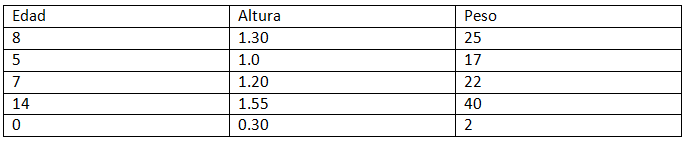

Podemos hacerlo como un grafico de 3 dimensiones:

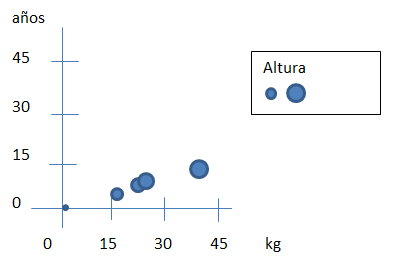

El primer paso sería calcular la línea que representa el máximo de información:

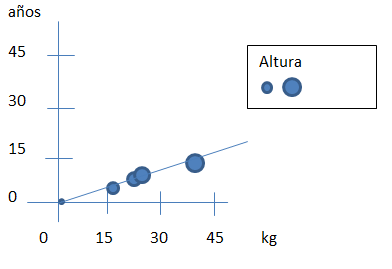

A esto lo llamamos el componente principal, y podríamos añadir otras líneas perpendiculares entre si, o componentes, para medir las distancias en otro sentido, ampliando la cantidad de información representada sin embargo, en este caso, dado que las variables tienen una correlación tan alta, la mayor parte de la información útil ya está contenida en esta línea, podes emplear cualquier calculadora de pca online y os dirá que este componente contiene el 98% de la varianza de los datos, por tanto, a nivel práctico, para el uso en cualquier modelo de machine learning podemos expresar todos los valores de este dataset en función de donde estarían en esta línea:

image.png

De forma similar podemos reducir matematicamente todas las variables que tenemos a la cantidad que nos convenga, en este caso, como veremos a continuación, emplearemos 15 componentes que cubriran más del 87% de la varianza.

In [42]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
scaler = scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
scaler = scaler.fit(x_train_2)
x_train_std_2 = scaler.transform(x_train_2)


In [43]:
# Creamos un PCA
m_pca = PCA(n_components=15)
#comp = m_pca.fit_transform(data_x)
comp_std = m_pca.fit_transform(x_train_std)
comp_std_2 = m_pca.fit_transform(x_train_std_2)

Comprobar que cantidad de información queda recogida en estos 15 primeros componentes principales.

In [44]:
# Obtener la cantidad de infromación en los CP.
m_pca.explained_variance_ratio_.sum()

0.8759498512874224

In [45]:
# Creamos datasets para llenar el modelo de predicción
x_train_pca = pd.DataFrame(comp_std)
x_train_pca_2 = pd.DataFrame(comp_std_2)

scaled_test = scaler.transform(x_test)
x_test_pca = pd.DataFrame(m_pca.transform(scaled_test))
scaled_test_2 = scaler.transform(x_test_2)
x_test_pca_2 = pd.DataFrame(m_pca.transform(scaled_test_2))

# No hara falta generar ytrain/test para pca ya que seran los mismos originales

###__Comentario :__
### EL uso del PCA es interesante para la reduccion de datos y de verdad que muestra de manera lineal una tendencia siempre y cuando exista una correlacion entre las variables analizadas para que su informacion sea lo mas coherente posible.

# Elección del Algoritmo

Para saber que algoritmo y que parámetros usar podemos implementar un GridSearch.

¿Para que sirve un GridSearch? Como todos sabemos, la mayoria de las funciones pueden tener parámetros para ajustar su funcionamiento y las funciones que se usan para crear modelos de predicción no son diferentes. Parámetros como, por ejemplo, la profundidad del modelo, afectaran a su precisión. 

Empleamos GridSearch para comprobar distintas combinaciones y seleccionar los mejores parámetros posibles (los que maximizen la precisión del modelo).

## Decision tree



Para los árboles de decisión usaremos solamente dos parámetros de max_depth y criterion para saber cual de los valores es mas adecuado para nuestro dataset. Usaremos solo dos porque se trata de uno de los modelos de predicción mas simples pero tambien eficaces y con solo tocar dos variables ya nos proporcionará unos resultados buenos.

In [46]:
#Hacemos un GridSearch para el Decision Tree y miramos su mejor puntuación
from sklearn.model_selection import GridSearchCV
ad = tree.DecisionTreeClassifier()

In [47]:
#Hacemos un diccionario para los parametros
parameters = [{'max_depth' : [5, 10, 15, 30, 50, 60, 100], 'criterion' : ['gini', 'entropy']}]
grid_search = GridSearchCV(estimator= ad,
                           param_grid= parameters,
                           scoring= 'accuracy',
                           cv=3,
                           n_jobs= -1)
grid_search_1 = grid_search.fit(x_train, y_train)
grid_search_2 = grid_search.fit(x_train_2, y_train_2)

### Usando x usuarios

In [48]:
print("The best hyperparameters from Decision Tree are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)


The best hyperparameters from Decision Tree are:
{'criterion': 'gini', 'max_depth': 15}

The mean accuracy of a model with these hyperparameters is:
0.8484848484848486


In [49]:
best_dt = grid_search.best_estimator_

### Usando todos los usuarios

In [50]:
print("The best hyperparameters from Decision Tree are:")
print(grid_search_2.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search_2.best_score_)


The best hyperparameters from Decision Tree are:
{'criterion': 'gini', 'max_depth': 15}

The mean accuracy of a model with these hyperparameters is:
0.8484848484848486


## Random Forest

En el random forest a diferencia de los aroles de decisión, nos interesa tocar mas parámetros para que éste funcione de la mejor forma posible ya que éste modelo és más complejo que el arbol de decisión y nos deberia dar mejores resultados que un arbol de decisión.

Si hicieramos directamente un GridSearch con bastantes opciones de parámetros la ejecución se demoraria bastante tiempo, para evitar ésto lo que haremos será usar primero un Random Search de los hiperparámetros para acotar todos los parámetros iniciales y una vez tenemos estos parámetros crearemos otros parámetros para el GridSearch basandonos en los obtenidos anteriormente

### Usando x usuarios

In [51]:
# First create the base model to tune
rf = RandomForestClassifier()
parameters = [{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}]
# Definition of the random search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=parameters,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1)

# Fit the random search model
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [52]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.4573070607553366


Una vez tenemos les mejores parametros creamos unos parametros mas reducidos basados en los obtenidos para pasarlos por un GridSearch

In [53]:
#Hacemos un GridSearch para el Decision Tree y miramos su mejor puntuación
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
#Hacemos un diccionario para los parametros
parameters = [{'bootstrap': [False],
 'max_depth': [20, 40],
 'max_features': ['auto'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [600, 800]}]
grid_search = GridSearchCV(estimator= rf,
                           param_grid= parameters,
                           scoring= 'accuracy',
                           cv=3,
                           n_jobs= -1)
grid_search = grid_search.fit(x_train, y_train)

Observamos con el best_params cuales son los mejores parametros para el random forest y cogemos el best estimator para hacer despúes el entrenamiento con los datos del dataset.

In [54]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.4556894113056626


In [55]:
best_rfc = grid_search.best_estimator_


In [56]:
best_rfc

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
features = pd.DataFrame( best_rfc.feature_importances_, index=x_train.columns, columns=["importance"]).sort_values("importance", ascending=False )
print("Top features:\n", features.head(),"\n\n Bottom features:\n",features.tail(10))

Top features:
                      importance
hrv_SD1_BOXCOX         0.048994
eda_MAX_YEO_JONSON     0.043493
hrv_LF_BOXCOX          0.042438
eda_MIN_YEO_JONSON     0.025464
eda_RMSC_YEO_JONSON    0.024700 

 Bottom features:
                               importance
hrv_KURT                        0.001327
hrv_KURT_REL_RR                 0.001091
hrv_KURT_YEO_JONSON             0.000946
hrv_MEAN_REL_RR                 0.000700
hrv_MEAN_REL_RR_YEO_JONSON      0.000568
hrv_MEAN_RR_MEAN_MEAN_REL_RR    0.000476
eda_MEAN_2ND_GRAD               0.000000
eda_MEAN_2ND_GRAD_CUBE          0.000000
eda_MEAN_2ND_GRAD_LOG           0.000000
eda_MEAN_2ND_GRAD_LOG_LOG       0.000000


### Usando todos los usuarios

In [58]:
# First create the base model to tune
rf = RandomForestClassifier()
parameters = [{'bootstrap': [True, False],
 'max_depth': [20, 40, 60, 80, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000]}]
# Definition of the random search
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=parameters,
                                   n_iter=10,
                                   scoring='accuracy',
                                   cv=3, 
                                   verbose=1)

# Fit the random search model
random_search.fit(x_train_2, y_train_2)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   33.1s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [59]:
print("The best hyperparameters from Random Search are:")
print(random_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(random_search.best_score_)

The best hyperparameters from Random Search are:
{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}

The mean accuracy of a model with these hyperparameters is:
0.9166666666666666


Una vez tenemos les mejores parametros creamos unos parametros mas reducidos basados en los obtenidos para pasarlos por un GridSearch

In [60]:
#Hacemos un GridSearch para el Decision Tree y miramos su mejor puntuación
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
#Hacemos un diccionario para los parametros
parameters = [{'bootstrap': [False],
 'max_depth': [40, 60],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [5, 10],
 'n_estimators': [800, 1000]}]
grid_search = GridSearchCV(estimator= rf,
                           param_grid= parameters,
                           scoring= 'accuracy',
                           cv=3,
                           n_jobs= -1)
grid_search = grid_search.fit(x_train_2, y_train_2)

In [61]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'bootstrap': False, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 800}

The mean accuracy of a model with these hyperparameters is:
0.9257575757575758


## Linear Regression

Por último vamos a obtener los mejores parámetros para Linear Regression usando también un GridSearch

### Usando x usuarios

In [62]:
#Hacemos un GridSearch para el Decision Tree y miramos su mejor puntuación
from sklearn.model_selection import GridSearchCV
lr = linear_model.LinearRegression()
#Hacemos un diccionario para los parametros
parameters = [{'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True, False]}]
grid_search = GridSearchCV(estimator= lr,
                           param_grid= parameters,
                           cv=10,
                           n_jobs= -1)
grid_search = grid_search.fit(x_train, y_train)


Ahora obtenemos los mejores parámetros y la precision media del modelo obtenido con GridSearch que después usaremos para entrenar

In [63]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'copy_X': True, 'fit_intercept': True, 'normalize': False}

The mean accuracy of a model with these hyperparameters is:
-11.131284942578551


### Usando todos los usuarios

In [64]:
#Hacemos un GridSearch para el Decision Tree y miramos su mejor puntuación
from sklearn.model_selection import GridSearchCV
lr = linear_model.LinearRegression()
#Hacemos un diccionario para los parametros
parameters = [{'fit_intercept':[True,False],
               'normalize':[True,False],
               'copy_X':[True, False]}]
grid_search = GridSearchCV(estimator= lr,
                           param_grid= parameters,
                           cv=10,
                           n_jobs= -1)
grid_search = grid_search.fit(x_train_2, y_train_2)

In [65]:
print("The best hyperparameters from Grid Search are:")
print(grid_search.best_params_)
print("")
print("The mean accuracy of a model with these hyperparameters is:")
print(grid_search.best_score_)

The best hyperparameters from Grid Search are:
{'copy_X': True, 'fit_intercept': True, 'normalize': True}

The mean accuracy of a model with these hyperparameters is:
0.3390549600030869


A cotninuación vamos a utilizar los modelos con los parámetros que hemos obtenido del GridSearch y los vamos a entrenar con los datos correspondientes.

Una vez entrenados vamos a observar la precisión en la predicción de cada modelo.

Antes vamos a comentar un aspceto que nos será de utilidad en el resto del taller.

###__Comentario :__
###Cuando no se ha visto mucha programacion en python y mas especificamente los modelos de prediccion, entonces el uso de la funcion grid_search() para buscar los parametros optimos de cada algoritmo es un poco confunso y asi sea efectiva quizas con una serie de ejercicios mas simples o sencillos ayudarian a comprender el uso y la aplicacion mucho mejor. En esta seccion se pudo observar como se la aplico para cada uno de los algoritmos y en base a los resultados ya se procede a crear los modelos entrenados teniendo en cuenta los parametors ideales para finalmente colocarlos a prueba.

## Super Vector Machine

In [66]:
from sklearn import svm

In [67]:
clasificador1= svm.SVC()
clasificador2= svm.SVC()
clasificador1_pca= svm.SVC()
clasificador2_pca= svm.SVC()

clasificador1.fit(x_train, y_train)
clasificador2.fit(x_train_2, y_train_2)
clasificador1_pca.fit(x_train_pca, y_train)
clasificador2_pca.fit(x_train_pca_2, y_train_2)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Modelo entrenado con los datos de x usuarios

In [68]:
print ("Modelo entrenado :: ", clasificador1)
prediccion = clasificador1.predict(x_test)

print ("Accuracy Set Training  :: ", accuracy_score(y_train, clasificador1.predict(x_train)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test, prediccion))

Modelo entrenado ::  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Set Training  ::  0.3980263157894737
Accuracy Set Test  ::  0.35403726708074534


[[ 0  0  8  0]
 [ 0  0 37  0]
 [ 0  1 57  0]
 [ 0  2 56  0]]


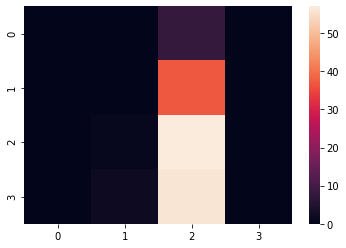

In [69]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [70]:
print ("Modelo entrenado :: ", clasificador1_pca)
prediccion_pca = clasificador1_pca.predict(x_test_pca)

print ("Accuracy Set Training  :: ", accuracy_score(y_train, clasificador1_pca.predict(x_train_pca)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test, prediccion_pca))

Modelo entrenado ::  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Set Training  ::  0.8289473684210527
Accuracy Set Test  ::  0.11801242236024845


### Modelo entrenado con los datos de todos los usuarios

In [71]:
print ("Modelo entrenado :: ", clasificador2)
prediccion = clasificador2.predict(x_test_2)

print ("Accuracy Set Training  :: ", accuracy_score(y_train_2, clasificador2.predict(x_train_2)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test_2, prediccion))

Modelo entrenado ::  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Set Training  ::  0.40454545454545454
Accuracy Set Test  ::  0.3253012048192771


[[ 0  0  0  1  0]
 [ 0  0  0  6  0]
 [ 0  0  0 54  0]
 [ 0  0  2 54  0]
 [ 0  0  1 48  0]]


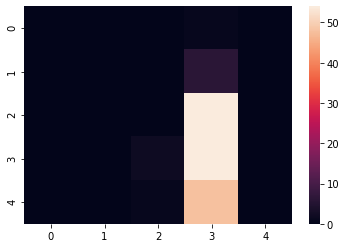

In [72]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test_2, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [73]:
print ("Modelo entrenado :: ", clasificador2_pca)
prediccion = clasificador2_pca.predict(x_test_pca_2)

print ("Accuracy Set Training  :: ", accuracy_score(y_train_2, clasificador2_pca.predict(x_train_pca_2)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test_2, prediccion))

Modelo entrenado ::  SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy Set Training  ::  0.7818181818181819
Accuracy Set Test  ::  0.7409638554216867


[[ 0  0  0  1  0]
 [ 0  1  1  4  0]
 [ 0  0 39 11  4]
 [ 0  0  5 51  0]
 [ 0  0  5 12 32]]


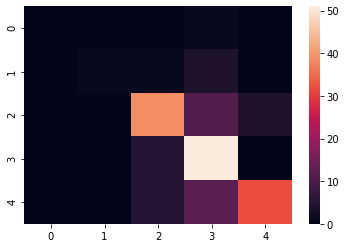

In [74]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test_2, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

###__Comentario :__
###Aqui se aplico el el entrenamiento, validacion y predicción con el algoritmo de SVM (Support Vector Machine) pero sin hacer uso de la funcion grid_search() ya que la verdad no se pudo realizar la configuracion adecuada para encontrar los parametros optimos a utilizar. Con esto se puede concluir que el uso del gridsearchVC() si ayuda bastante a la hora de entrenar un modelo, ya que a diferencia de los otros modelos entrenados en donde si se pudo aplicar el gridsearch() el accuaracy tanto en el dataset de entrenamiento como en el de prueba los resultados fueron mucho mejores. Para el caso del SVM los mejores resultados se obtuvieron con el uso de PCA con el entrenamiento de los datos de todos los usuarios. con un 75% de precision, por lo que al usar gridsearchVC() efectivamente estos valores mejorarian un poco mas.

# Entrenamiento

## Gini importance

Sabemos que un árbol de decisión tiene una estructura de árbol tal y como indica el nombre y que en éste arbol hay distintos nodos que nos llevan por un camino o otro dependiendo del valor que estamos evaluando. En cada nodo se evalua una característica del dataset. Es normal pensar que hay características que tendrán más influencia en el resultado de la predicción, si lo decimos de otra forma podemos decir que hay nodos que afectarán más a la variable resultado. 

Si un random forest está formado por distintos árboles de decisión (cómo podemos ver en la imagen), también tendremos los nodos y sus respectivas importancias.

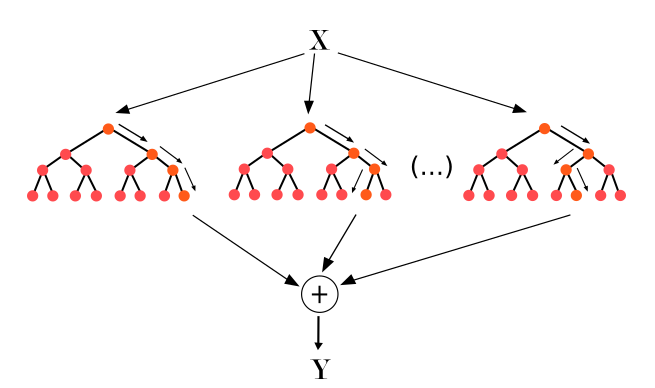


Gini importance sirve para medir exactamente esto, cuan importante es una carcaterística dentro de un árbol de decisión o random forest respecto la variable final. Este valor de importancia está entre 0 y 1 y la suma de todas las gini-importance de todas las características será 1.

Si una característica tiene una gini-importance muy cercana al valor 1 esto querrá decir quue esa caracterítica influye mucho en el resultado y que quizá esa variable está relacionada de forma lineal con la variable objetivo.

Más adelante veremos la gini-importance para el random forest y se observará de forma gráfica.

## Decision tree

Entrenamos el modelo obtenido del GridSearch con los datos de entrenamiento

In [75]:
#Creamos un decision tree y lo llenamos con los datos que hems dividio
dt = RandomForestClassifier(criterion= 'gini', max_depth=60)
modelo_ad = dt.fit(x_train, y_train)
modelo_ad_2 = dt.fit(x_train_2, y_train_2)

## Random Forest

Primero creamos el modelo con los parámetros obtenidos a traves de GridSearch y después lo entrenamos con los datos.

In [76]:
# Creamos el random forest y lo llenamos con los datos que hemos dividido anteriormente
rf = RandomForestClassifier(bootstrap= False, max_depth= 20, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 600)
modelo = rf.fit(x_train, y_train)

Ahora hacemos lo mismo pero con los datos obtenidos al hacer un PCA.

In [77]:
# Hacemos lo mismo pero ahora con los datos obtenidos usando PCA
rf = RandomForestClassifier(bootstrap= False, max_depth= 20, max_features= 'auto', min_samples_leaf= 4, min_samples_split= 5, n_estimators= 600)
modelo_pca = rf.fit(x_train_pca, y_train)

Y ahora entrenaremos los modelos con los datos de todos los usuarios

In [78]:
rf = RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 1000)
modelo_2 = rf.fit(x_train_2, y_train_2)

In [79]:
rf = RandomForestClassifier(bootstrap= False, max_depth= 60, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 1000)
modelo_pca_2 = rf.fit(x_train_pca_2, y_train_2)

## Linear Regression





CReamos el Linear Regressor con los mismos parámetros que hemos obtenido de hacer el GridSearch y lo llenamos con los datos de entrenamiento

In [80]:
#Creamos un Linear Regressor y lo llenamos con los datos
lr = linear_model.LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
modelo_lr = lr.fit(x_train, y_train)
lr = linear_model.LinearRegression(copy_X= True, fit_intercept= True, normalize= True)
modelo_lr_2 = lr.fit(x_train_2, y_train_2)

###__Comentario :__
###Aqui ya se termina el entrenamiento de los modelos y algoritmos utilizados anteriormente y ya se preparan estos para su respectiva validación.

# Evaluación

Las medidas de calidad de modelos de clasificación se calculan
comparando las predicciones generadas por el modelo en
un conjunto de datos D con las etiquetas de clase verdaderas
de las instancias de este conjunto de datos.

## Matriz de Confusión 



Para tener una visión gráfica de las predicciones y de los errores cometidos se utiliza la matriz de consusión (*confusion matriz*). Esta tabla pretende visualizar el nivel de acierto en las tareas de clasificación o predicción de las clases basado en un conjunto de datos nuevos (*training dataset*). Esta matriz también es conocida como *tabla de contingencia* o  *matriz de errores*.

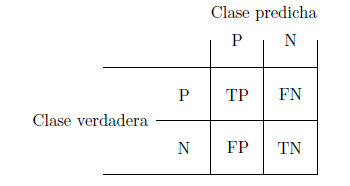

En resumen, en esta tabla se muestran el numero de instancias correcta e incorrectamente clasificadas. Los parámetros definidos en esta tabla son :

* Verdadero positivo (*True Positive*, TP): número de clasificaciones
correctas en la clase positiva (P).
* Verdadero negativo (*True Negative*, TN): número de clasificaciones
correctas en la clase negativa (N).
* Falso negativo (*False Negative*, FN): número de clasificaciones
incorrectas de clase positiva clasificada como
negativa.
* Falso positivo (*False Positive*, FP): número de clasificaciones
incorrectas de clase negativa clasificada como
positiva.

**Nota** : Algoritmos como los árboles de decisión, k-NN y support
vector machine son ejemplos de la tipología supervisada sobre
los que cabría utilizar una matriz de confusión para medir su
grado de acierto.



## Matriz de Consusión para *k* clases

La matriz de confusión se puede extender a más de dos
clases de forma natural, tal y como podemos ver en la siguiente figura. Esta representación nos permite identificar de forma
rápida el número de instancias correctamente clasificadas, que
se corresponde con la diagonal de la tabla.

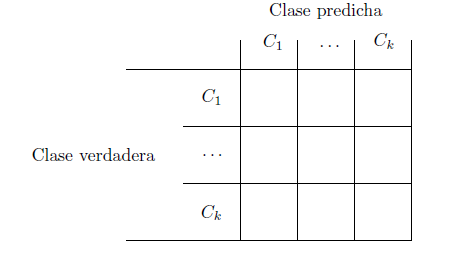

Para este caso (problemas de clasificación que
impliquen más de dos clases) se puede realizar la evaluación
de dos formas distintas:

* 1-*vs*-1 (OvO): midiendo la capacidad de discriminar entre
instancias de una clase, considerada la clase positiva,
frente a las instancias de otra clase, consideradas negativas.
* 1-*vs*-all (OvA): midiendo la capacidad de discriminar
entre instancias de una clase, considerada la clase positiva,
frente a las instancias de las demás clases, consideradas
negativas.

La aproximación de 1-*vs*-1 nos conduce a una matriz de
confusión, con formato 2 x 2, para cada par de clases existentes.
Por otra parte, la aproximación 1-*vs*-all produce una
matriz de confusión 2 x 2 para cada clase.

## Métricas Derivadas de la Matriz de Confusión

A partir de la matriz de confusión, definimos un conjunto
de métricas que permiten cuantificar la bondad de un modelo
de clasificación.

El error de clasificación (*misclassification error*, ERR) y la
exactitud (*accuracy*, ACC) proporcionan información general
sobre el número de instancias incorrectamente clasificadas. El
error, ecuación quye describe el *ERR* es la suma de la predicciones incorrectas
sobre el número total de predicciones. Por el contrario, la precisión
es el número de predicciones correctas sobre el número
total de predicciones, como se puede ver en la ecuación ???.

$ ERR = \frac{FP + FN}{FP + FN + TP + TN}$  

  
$ ACC = \frac{TP + TN}{FP + FN + TP + TN} = 1  - ERR$ 



En algunos problemas nos puede interesar medir el error en
los falsos positivos o negativos. Por ejemplo, en un sistema de
diagnosis de tumores, nos interesa centrarnos en los casos de
tumores malignos que han sido clasificados incorrectamente
como tumores benignos. En estos casos, la tasa de verdaderos
positivos (*True Positive Rate*, TPR) y la tasa de verdaderos
negativos (*False Positive Rate*, FPR), que definimos a
continuación, pueden ser muy útiles:

$ TPR = \frac{TP}{FN + TP}$ 

$ FPR = \frac{FP}{TP + FP}$ 

La precisión (*precision*, PRE) mide el rendimiento relacionado
con las tasas de verdaderos positivos y negativos, tal y
como podemos ver a continuación.

$ PRE = \frac{TP}{TP + FP}$ 

El recall (*recall*, REC) y la sensibilidad (*sensitivity*, SEN)
se corresponden con la tasa de verdaderos positivos (TPR),
mientras que la especificidad (*specificity*, SPE) se define como
la tasa de instancias correctamente clasificadas como negativas
respecto a todas las instancias negativas.

$ REC = SEN = TPR = \frac{TP}{FN + TP}$ 

$ SPE = \frac{TN}{TN + FP} = 1 - FPR$ 

Finalmente, en la práctica se suelen combinar la precisión y
el recall en una métrica llamada F1 (F1 score), que se define
de la siguiente forma:

$ F1 = 2  \frac{PRE * REC}{PRE + REC}$ 


Una forma de observar éstas métricas de forma visual es siguiendo la siguiente imagen[1]:
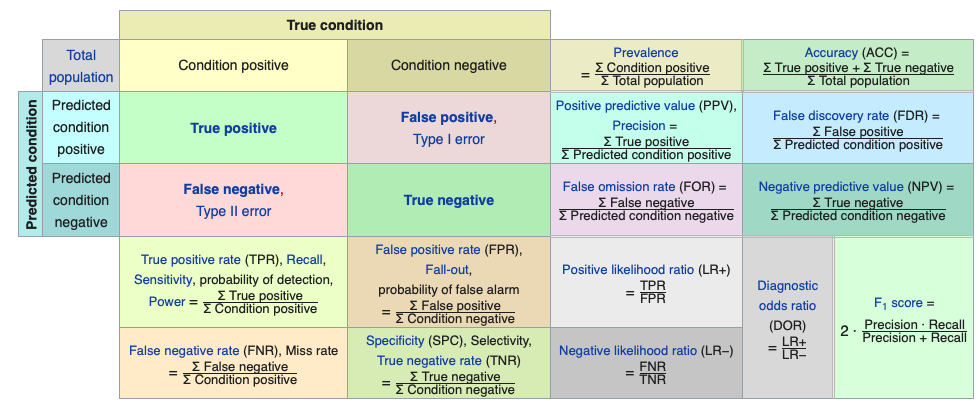
 

###__Comentario :__
###Aqui se observa varias maneras de como probar los valores predichos con los valores originales. Esto demuestra una vez mas la facilidad y versatilidad que se tiene en python a la hora de realizar estas comparaciones facilitando asi el analisis de los resultados finales.

## Decision Tree

A continuación vamos a hacer las predicciones y mostrar tanto la exactitud del modelo con los datos de entrenamiento con los datos preparados para el test. Mirar la predicción con los datos de entrenamiento sirve para observar si hay un comportamiento extraño.

### Modelo entrenado con los datos de x usuarios

In [81]:
print ("Modelo entrenado :: ", modelo_ad)
prediccion = modelo_ad.predict(x_test)

print ("Accuracy Set Training  :: ", accuracy_score(y_train, modelo_ad.predict(x_train)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test, prediccion))

Modelo entrenado ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  0.9901315789473685
Accuracy Set Test  ::  1.0



Ahora vamos a ver los mismo pero usando una matriz de confusión, para ello vamos a usar las matrices de confusión y lo vamos a visualizar en un heatmap ya que se puede observar mejor de forma gráfica que no con una matriz

[[ 8  0  0  0]
 [ 0 37  0  0]
 [ 0  0 58  0]
 [ 0  0  0 58]]


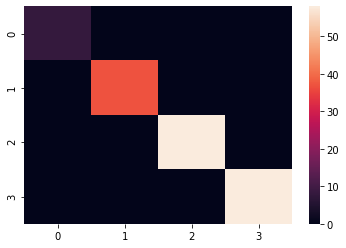

In [82]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()


### Modelo entrenado con los datos de todos los usuarios

In [83]:
print ("Modelo entrenado :: ", modelo_ad_2)
prediccion = modelo_ad_2.predict(x_test_2)

print ("Accuracy Set Training  :: ", accuracy_score(y_train_2, modelo_ad_2.predict(x_train_2)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test_2, prediccion))

Modelo entrenado ::  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  1.0
Accuracy Set Test  ::  0.9578313253012049


[[ 1  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 49  1  4]
 [ 0  0  1 55  0]
 [ 0  0  0  1 48]]


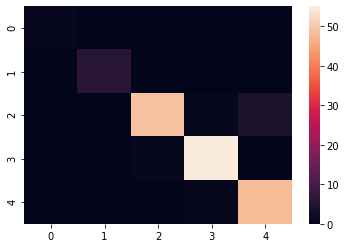

In [84]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test_2, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

## Random Forest

### Modelo entrenado con los datos de x usuarios

Ahora vamos a hacer lo mismo que hemos hecho antes con el Decision Tree pero para lso dos modelos que hemos creado de Random Forest, primero lo haremos con el que usa los datos que no han sido obtenidos mediante PCA y después miraremos el modelo con PCA.

In [85]:
print ("Modelo entrenado :: ", modelo)
prediccion = modelo.predict(x_test)

print ("Accuracy Set Training  :: ", accuracy_score(y_train, modelo.predict(x_train)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test, prediccion))

Modelo entrenado ::  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  0.9983552631578947
Accuracy Set Test  ::  0.16770186335403728


Ahora vamos a ver los mismo pero usando una matriz de confusión, para ello vamos a usar las matrices de confusión y lo vamos a visualizar en un heatmap ya que se puede observar mejor de forma gráfica que no con una matriz

[[ 0  0  8  0]
 [ 0  6 31  0]
 [ 4 37 16  1]
 [ 1 19 33  5]]


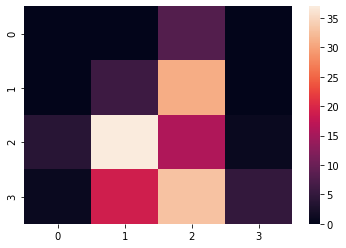

In [86]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()


Observamos, mediante la paleta de colores, que en la diagonal que es donde encontramos los aciertos es donde residen los valores altos. Con esto podemos ver que el modelo funciona muy bien ya que ningún otro espacio del heatmap se encuentra coloreado indicando así que no hay predicciones erroneas

In [87]:
print ("Modelo entrenado :: ", modelo_pca)
prediccion_pca = modelo_pca.predict(x_test_pca)

print ("Accuracy Set Training  :: ", accuracy_score(y_train, modelo_pca.predict(x_train_pca)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test, prediccion_pca))

Modelo entrenado ::  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  0.9983552631578947
Accuracy Set Test  ::  0.2111801242236025



Ahora vamos a ver los mismo pero usando una matriz de confusión, para ello vamos a usar las matrices de confusión y lo vamos a visualizar en un heatmap ya que se puede observar mejor de forma gráfica que no con una matriz

[[ 0  0  2  6]
 [ 0 14 11 12]
 [ 0 40 13  5]
 [ 0 40 11  7]]


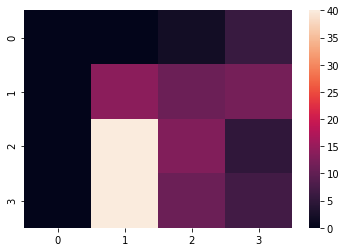

In [88]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test, prediccion_pca)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()


Ahora vamos a ver cuales son las características que mas influyen en el random forest para determinar el nivel de estrés que está sufriendo el paciente. Usaremos por ejemplo el modelo que no usa PCA para mostrarlo

In [89]:
%matplotlib inline

feats = {} # a dict to hold feature_name: feature_importance
# Para cada característica y su valor la añadimos al diccionario
for feature, importance in zip(data.columns, modelo.feature_importances_):
    feats[feature] = importance 

#Creamos un dataframe del diccionario que acabamos de obtener con todas las importancias
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
# Ordenamos los datos por mayor importancia y hacemos un plot
importances.sort_values(by='Gini-importance').plot(kind='bar', rot=45)

Si miramos el gráfica podemos observar a la derecha las features que tienen una mayor correlación oq ue influyen más con la variable resultado (SSSQ). Aún así podemos ver que la relación que tienen no és muy grande ya que el valor dee importancia no llega ni a alcanzar el 0.05. 

Si nos encontarramos una variable que se distanciara mucho de las otras estariamos en un caso en el que esa variable pudera estar directamente relacionada con la variable resultado.

### Modelo entrenado con todos los datos de todos los usuarios

In [90]:
print ("Modelo entrenado :: ", modelo_2)
prediccion = modelo_2.predict(x_test_2)

print ("Accuracy Set Training  :: ", accuracy_score(y_train_2, modelo_2.predict(x_train_2)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test_2, prediccion))

Modelo entrenado ::  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  1.0
Accuracy Set Test  ::  0.9698795180722891


[[ 1  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0 50  0  4]
 [ 0  0  0 56  0]
 [ 0  0  0  1 48]]


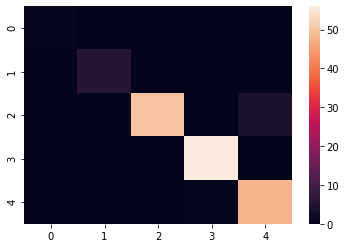

In [91]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test_2, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

In [92]:
print ("Modelo entrenado :: ", modelo_pca_2)
prediccion = modelo_pca_2.predict(x_test_pca_2)

print ("Accuracy Set Training  :: ", accuracy_score(y_train_2, modelo_pca_2.predict(x_train_pca_2)))
print ("Accuracy Set Test  :: ", accuracy_score(y_test_2, prediccion))

Modelo entrenado ::  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy Set Training  ::  1.0
Accuracy Set Test  ::  0.8433734939759037


[[ 1  0  0  0  0]
 [ 0  2  1  2  1]
 [ 0  0 46  3  5]
 [ 0  0  4 52  0]
 [ 0  0  2  8 39]]


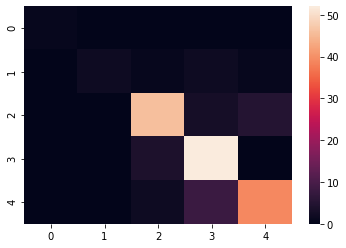

In [93]:
from sklearn.metrics import confusion_matrix
labels = np.array(data['SSSQ'])

CM = confusion_matrix(y_test_2, prediccion)
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

Podemos observar como hay diferencias en la predicción de los dos modelos, el que no usa PCA obtiene una menor precisión. ¿A que se debe eso?

Es un comportamiento normal ya que el PCA lo que hace es un analisis de los componentes principales para redimensionar el conjunto. Al hacer eso se obtienen nuevos datos de menos dimensionalidad por lo que no se usan todos los datos y es normal que con menos información de menos resultados.

Entonces, ¿Porque es util el PCA? Es util porque en casos en los que tenemos muchisimas dimensiones en el conjunto de datos el procesamiento puede tener un coste computacional muy elevado y si usamos PCA reducimos ese coste sin perder una gran cantidad de información.

## Linear Regression

### Modelo entrenado con los datos de x usuarios

In [94]:
#Accuracy no se puede utilizar con regression por lo que debemos usar diferentes metricas para valorar la exactitud de este algoritmo
print ("Modelo entrenado :: ", modelo_lr)
prediccion = modelo_lr.predict(x_test)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test, prediccion))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, prediccion))

Modelo entrenado ::  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Coefficients: 
 [-3.86199169e+11  3.44106439e+03 -3.44206831e+03 -3.44230702e+03
  5.40072245e-02 -5.32715809e-01  3.73462970e+14  1.34676188e+03
 -2.31127774e+15 -1.22546881e+03 -7.13203524e+05  1.83904366e+06
 -2.90126094e+01  8.65310518e+00  5.36826998e+01 -4.41419726e+01
  8.70810150e+00 -4.92590500e+01 -1.36240357e+01  2.13553317e+12
  4.56781190e+00 -7.46926860e+14  4.60664723e+15  3.33476608e+00
  3.73463890e+14 -2.29536949e+15  2.48295518e+01 -2.63209821e+13
 -4.15528791e+06  8.31057721e+06 -3.25002509e-01 -4.75877117e+00
  4.48391641e-01 -3.76115021e-02 -1.79299513e+00  5.23085692e-04
  7.57557731e-02 -8.77626893e+04  5.78575360e+00 -5.37251214e+00
  1.59276253e+01  2.90014353e+01  2.16028225e+18 -7.43843550e-05
 -2.57274536e+04 -2.57272704e+04 -2.57275025e+04 -2.57278676e+04
 -1.98088490e-01  3.72792343e-03 -1.71018632e+00  8.48043891e+00
 -1.15906827e+03 -1.11570250e-01 -1.734

### Modelo entrenado con los datos de todos los uauarios

In [95]:
#Accuracy no se puede utilizar con regression por lo que debemos usar diferentes metricas para valorar la exactitud de este algoritmo
print ("Modelo entrenado :: ", modelo_lr_2)
prediccion = modelo_lr_2.predict(x_test_2)

# The coefficients
print('Coefficients: \n', lr.coef_)
# The mean squared error
print('Mean squared error: %.2f'% mean_squared_error(y_test_2, prediccion))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test_2, prediccion))

Modelo entrenado ::  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
Coefficients: 
 [-3.86199169e+11  3.44106439e+03 -3.44206831e+03 -3.44230702e+03
  5.40072245e-02 -5.32715809e-01  3.73462970e+14  1.34676188e+03
 -2.31127774e+15 -1.22546881e+03 -7.13203524e+05  1.83904366e+06
 -2.90126094e+01  8.65310518e+00  5.36826998e+01 -4.41419726e+01
  8.70810150e+00 -4.92590500e+01 -1.36240357e+01  2.13553317e+12
  4.56781190e+00 -7.46926860e+14  4.60664723e+15  3.33476608e+00
  3.73463890e+14 -2.29536949e+15  2.48295518e+01 -2.63209821e+13
 -4.15528791e+06  8.31057721e+06 -3.25002509e-01 -4.75877117e+00
  4.48391641e-01 -3.76115021e-02 -1.79299513e+00  5.23085692e-04
  7.57557731e-02 -8.77626893e+04  5.78575360e+00 -5.37251214e+00
  1.59276253e+01  2.90014353e+01  2.16028225e+18 -7.43843550e-05
 -2.57274536e+04 -2.57272704e+04 -2.57275025e+04 -2.57278676e+04
 -1.98088490e-01  3.72792343e-03 -1.71018632e+00  8.48043891e+00
 -1.15906827e+03 -1.11570250e-01 -1.734

El coefficient of determination si fuera 1 nos indicaria que la predicción es perfecta, en este caso podemos observar como ronda el 0.5, esto puede enir a decir que la precisión de este modelo es del 50%

###_**Comentario**_
###Aqui ya se puede observar la prediccion de cada uno de los modelos preentrenados y la presicion que estos obtuvieron. Claramente se observa la diferencia que tienen un modelo con el otro y la eficiencia que cada uno de estos presenta, ademas de mostrar la reelevancia de por ejemplo usar PCA.

# Guardar los modelos

In [96]:
!pip install joblib --quiet
import joblib
joblib.dump(modelo_ad, "dt.pkl")  #Guardomos el arbol de decision
joblib.dump(modelo, "rf.pkl")     #Guardomos el random forest
joblib.dump(modelo_lr, "lr.pkl")  #Guardomos la linear regresion
joblib.dump(Clasificador2_PCA,"SVM.pkl") #Guardamos el SVM
mean_values = [x_train.mean(axis=0)]
joblib.dump(mean_values, "meanVal.pkl")  #Guardomos la media de los datos.
max_values = [x_train.max(axis=0)]
joblib.dump(max_values, "maxVal.pkl")  #Guardomos los maximos de los datos.
min_values = [x_train.min(axis=0)]
joblib.dump(min_values, "minVal.pkl")  #Guardomos los minimos de los datos.

NameError: ignored

###**Comentario**
###Aquí finalmente se guardan los modelos para ya poderlos utilizar directamente en las aplicaciones que se deseen desarrollar.

#Conclusiones personales


*   ### Las funciones como gridsearchCV() como el metodo de PCA ayuda bastante a la hora de entrenar un modelo debido a que esto hace de que se optimice la manera de hacerlo obteniendo asi en las pruebas de validacion un Accuaracy mucho mayor.
*   ### Al igual las conclusiones ya mencionadas en este notebook se concluye tambien que el random forest es el que muestra buenos resultados sobre el arbol de decision y la regresion lineal. Lastimosamente al no poder aplicar de manera optima el algoritmo de SVM con el uso de gridsearchCV() no se pudo hacer una comparacion de que algoritmo presentaria mejores resultados pero en otros casos de estudio un porcentaje mejor lo suele dar el algoritmo de SVM.

# Conclusiones

Como hemos podido ver, el modelo que proporciona mejores resultados es el random forest. Ésto es debido a que éste es una version que deberia mejorar a los árboles de decision, y en este caso se demuestra.

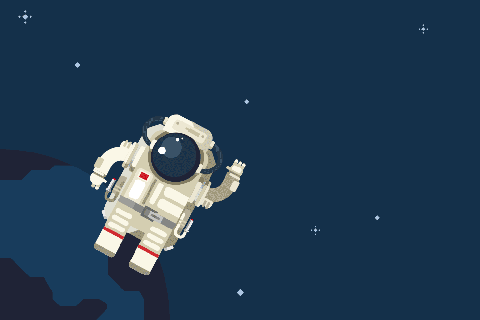

También hemo spodiso observar como en este taller los resultados del modelo son muy buenos cuando el modelo ha sido entrenado con los datos de ese mismo usuario. Ahora bién, si quitamos los dats de un usuario entero y el modelo no sabe nada d eese usuario las predicciones son bastante malas. ¿A que podria ser debido ésto? Lo mas seguro es que el modelo solo tiene unos pocos sujetos para entrenare, con muchos datos d ecada usuario pero al final siguen sienod pocos usuarios. Como se entrena con pocoso usuarios el modleo nsolo ha sido entrenado con unos pocos ejemplos de como podria actuar el cuerpo humano y al predecir un sujeto que no se comporta de forma similar, éste falla.

In [ ]:
import joblib
joblib._version_

# Fuentes

[1] https://en.wikipedia.org/wiki/Confusion_matrix